<b>¡Hola Emanuel!</b>

Mi nombre es Alejandro Abia y tengo el gusto de revisar tu proyecto.

A continuación, encontrarás mis comentarios en celdas pintadas de tres colores (verde, amarillo y rojo), a manera de semáforo. Por favor, <b>no las borres ni muevas de posición</b> mientras dure el proceso de revisión.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
En celdas verdes encontrarás comentarios en relación a tus aciertos y fortalezas.
</div>
<div class="alert alert-block alert-warning">
<b>Antención</b> <a class="tocSkip"></a>
Utilizaré el color amarillo para llamar tu atención, expresar algo importante o compartirte alguna idea de valor.
</div>
<div class="alert alert-block alert-danger">
<b>A resolver</b> <a class="tocSkip"></a>
En rojo emitiré aquellos puntos que deberás atender para aprobar la revisión.
</div>
<div class="alert alert-block alert-info">
<b>Comentario estudiante</b><a class="tocSkip"></a>
Es factible que, a lo largo del proceso de revisión, quieras dejarme comentarios. Si es el caso, por favor realízalo dentro de celdas azules como esta.
</div>
Respecto del proceso de revisión, tu proyecto será aceptado una vez que los comentarios en rojo hayan sido atendidos.
¡Empecemos!

### Garantizando la Aleatoriedad y la Fiabilidad en Experimentos AA:  Un Análisis de Eventos y Conversiones

En este proyecto, realicé un análisis estadístico riguroso para validar la correcta asignación aleatoria de grupos en un experimento A/A, enfocado en medir tasas de conversión y comportamiento de usuarios.

Mediante el uso de tests de proporciones (z-test) comparé la incidencia de eventos clave entre dos grupos de control, confirmando que no existen diferencias estadísticamente significativas. Esto garantiza la integridad del experimento y la validez de futuros tests A/B basados en esta segmentación.

Esta experiencia me permitió profundizar en técnicas de estadística aplicada, manejo de grandes volúmenes de datos y en la interpretación precisa de resultados para la toma de decisiones basadas en datos.

In [ ]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
from datetime import datetime
import matplotlib.dates as mdates
from collections import Counter
from statsmodels.stats.proportion import proportions_ztest




In [ ]:
df_logs = pd.read_csv('/datasets/logs_exp_us.csv', sep="\t")


In [ ]:
df_logs.rename(columns={
    'eventname': 'event_name',
    'deviceidhash': 'device_id_hash',
    'eventtimestamp': 'event_timestamp',
    'expid': 'experiment_id'
}, inplace=True)

In [ ]:
new_col_names = []
for old_name in df_logs.columns:
    name_stripped = old_name.strip()
    name_lowered = name_stripped.lower()
    new_col_names.append(name_lowered)
df_logs.columns=new_col_names
df_logs

,eventname,deviceidhash,eventtimestamp,expid
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247
244122,MainScreenAppear,5849806612437486590,1565212439,246
244123,MainScreenAppear,5746969938801999050,1565212483,246
244124,MainScreenAppear,5746969938801999050,1565212498,246


In [ ]:
df_logs.isna().mean()

eventname         0.0
deviceidhash      0.0
eventtimestamp    0.0
expid             0.0
dtype: float64

<div class="alert alert-block alert-success">
<b>Celdas [1–5]</b> <a class="tocSkip"></a><br>
Muy bien la preparación inicial de los datos. El renombramiento de columnas es robusto y considera la estandarización con `strip()` y `lower()`, lo cual es una buena práctica. Además, se valida la ausencia de valores nulos desde el inicio, lo cual permite continuar con confianza en la limpieza del dataset.
</div>


In [ ]:
# Renombrar las columnas
df_logs.rename(columns={
    'EventName': 'event_name',
    'DeviceIDHash': 'device_id_hash',
    'EventTimestamp': 'event_timestamp',
    'ExpId': 'experiment_id'
}, inplace=True)

In [ ]:
df_logs.head()

,eventname,deviceidhash,eventtimestamp,expid
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


In [ ]:
# Convertir a datetime
df_logs["datetime"] = pd.to_datetime(df_logs["eventtimestamp"], unit='s')
df_logs["date"] = df_logs["datetime"].dt.date

cuantos eventos hay en los registros?

In [ ]:
total_events = len(df_logs)
print(f"Total de eventos: {total_events}")

Total de eventos: 244126


¿Cuántos usuarios hay en los registros?

In [ ]:
registered_users = len(df_logs)
print(f"usuarios registrados: {registered_users}")

usuarios registrados: 244126


<div class="alert alert-block alert-warning">
<b>Celdas [10]</b> <a class="tocSkip"></a><br>
En la celda donde se calcula el número de usuarios, se usa `len(df_logs)` en lugar de contar usuarios únicos. Esto no responde correctamente a la pregunta "¿Cuántos usuarios hay en los registros?". Se debería usar `nunique()` sobre `deviceidhash` para evitar confusión y obtener una métrica significativa.
</div>


¿Cuál es el promedio de eventos por usuario?

In [ ]:
# Total de usuarios únicos
usuarios_unicos = df_logs["deviceidhash"].nunique()

# Promedio de eventos por usuario
promedio_eventos_por_usuario = total_events / usuarios_unicos

print(f"Promedio de eventos por usuario: {promedio_eventos_por_usuario:.2f}")

Promedio de eventos por usuario: 32.33


¿Qué periodo de tiempo cubren los datos? fecha máxima y mínima. histograma por fecha y hora. 

In [ ]:
fecha_min = df_logs["datetime"].min()
fecha_max = df_logs["datetime"].max()

print(f"Fecha mínima: {fecha_min}")
print(f"Fecha máxima: {fecha_max}")

Fecha mínima: 2019-07-25 04:43:36
Fecha máxima: 2019-08-07 21:15:17


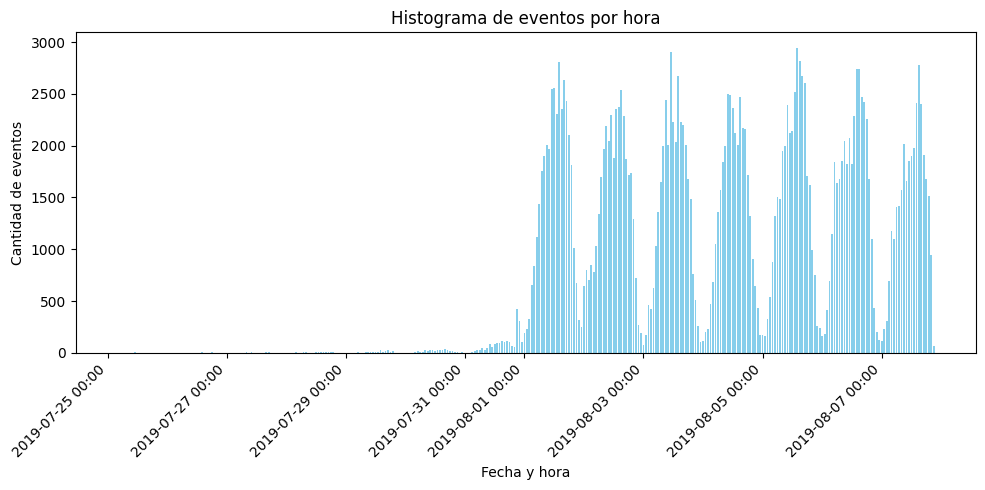

In [ ]:
# Agrupar por hora
df_logs["hour"] = df_logs["datetime"].dt.floor('H')
eventos_por_hora = df_logs.groupby("hour").size()

# Crear gráfico
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(eventos_por_hora.index, eventos_por_hora.values, width=0.03, color='skyblue')

# Formatear fechas en eje X
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d %H:%M"))
plt.xticks(rotation=45, ha='right')

plt.title("Histograma de eventos por hora")
plt.xlabel("Fecha y hora")
plt.ylabel("Cantidad de eventos")
plt.tight_layout()
plt.show()

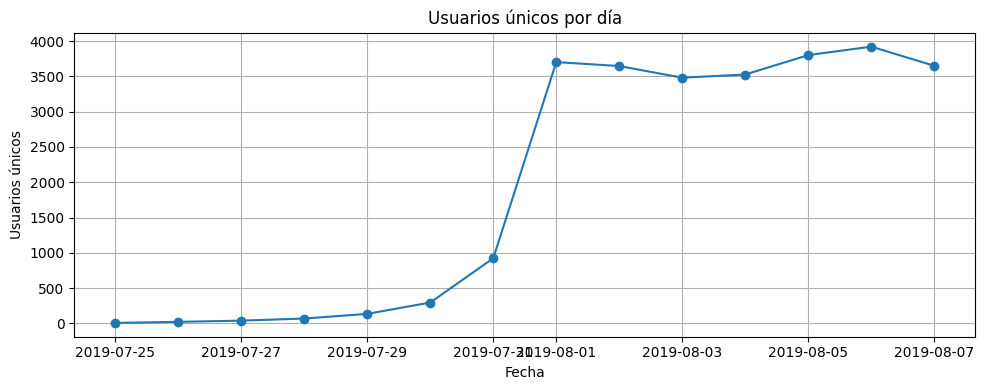

In [ ]:
# Convertir timestamps y agrupar por día
df_logs["datetime"] = pd.to_datetime(df_logs["eventtimestamp"], unit="s")
df_logs["date"] = df_logs["datetime"].dt.date

# Contar usuarios únicos por día
usuarios_por_dia = df_logs.groupby("date")["deviceidhash"].nunique()

# Graficar usuarios únicos por día
plt.figure(figsize=(10, 4))
usuarios_por_dia.plot(marker='o')
plt.title("Usuarios únicos por día")
plt.xlabel("Fecha")
plt.ylabel("Usuarios únicos")
plt.grid(True)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
<b>Celdas [11–14]</b> <a class="tocSkip"></a><br>
Excelente manejo de fechas y análisis temporal. El uso de histograma por hora y gráfico de usuarios únicos por día facilita la comprensión del comportamiento en el tiempo. Además, identificar un punto de estabilización en la actividad de usuarios y filtrar desde ahí es una decisión analítica acertada.
</div>


al principio hay solo 1-2 usuarios y luego un aumento repentino y sostenido, eso indica que los datos antes del punto de subida son parciales. una vez obtenido el punto estable filtramos a partir de esa fecha,antes del punto estable no hay gran perdida de datos 



In [ ]:
fecha_inicio_real = pd.to_datetime("2019-07-25")  # ejemplo
df_filtrado = df_logs[df_logs["datetime"] >= fecha_inicio_real]

In [ ]:
expids_unicos = df_logs["expid"].unique()
print(f"Grupos experimentales encontrados: {expids_unicos}")

Grupos experimentales encontrados: [246 248 247]


In [ ]:
usuarios_por_expid = df_logs.groupby("expid")["deviceidhash"].nunique()
print("Usuarios únicos por grupo experimental:")
print(usuarios_por_expid)

Usuarios únicos por grupo experimental:
expid
246    2489
247    2520
248    2542
Name: deviceidhash, dtype: int64


frecuencia de eventos

In [ ]:
event_counts = df_logs['eventname'].value_counts().reset_index()
event_counts.columns = ['eventname', 'frequency']
event_counts = event_counts.sort_values(by='frequency', ascending=False)

print(event_counts)

                 eventname  frequency
0         MainScreenAppear     119205
1       OffersScreenAppear      46825
2         CartScreenAppear      42731
3  PaymentScreenSuccessful      34313
4                 Tutorial       1052


usuarios unicos por evento

In [ ]:
unique_users_per_event = df_logs.groupby('eventname')['deviceidhash'].nunique().reset_index()
unique_users_per_event.columns = ['eventname', 'unique_users']
unique_users_per_event = unique_users_per_event.sort_values(by='unique_users', ascending=False)

# Muestra la cantidad de usuarios únicos por evento
print(unique_users_per_event)

                 eventname  unique_users
1         MainScreenAppear          7439
2       OffersScreenAppear          4613
0         CartScreenAppear          3749
3  PaymentScreenSuccessful          3547
4                 Tutorial           847


Calculamos la proporción de usuarios que realizaron al menos una vez cada tipo de evento, lo que nos da una idea de qué tan "difundido" está cada evento en la base de usuarios

In [ ]:
total_unique_users = df_logs['deviceidhash'].nunique()

# Calcula la proporción de usuarios que realizaron cada evento al menos una vez
unique_users_per_event['user_proportion'] = unique_users_per_event['unique_users'] / total_unique_users

# Muestra la proporción de usuarios por evento
print(unique_users_per_event)

                 eventname  unique_users  user_proportion
1         MainScreenAppear          7439         0.985168
2       OffersScreenAppear          4613         0.610912
0         CartScreenAppear          3749         0.496491
3  PaymentScreenSuccessful          3547         0.469739
4                 Tutorial           847         0.112171


<div class="alert alert-block alert-success">
<b>Celdas [18–20]</b> <a class="tocSkip"></a><br>
El análisis de frecuencia y difusión de eventos está bien fundamentado. Calcular la proporción de usuarios únicos por evento permite entender qué tan distribuido está cada evento entre la base de usuarios. Además, ordenar los eventos en una lógica de embudo ayuda a establecer hipótesis valiosas para el análisis posterior.
</div>


Orden probable de los eventos (hipótesis de embudo):
MainScreenAppear

Punto de entrada más común en una app. La mayoría de los usuarios comienzan aquí.

OffersScreenAppear

Es común que los usuarios vean ofertas antes de comprar.

CartScreenAppear

Acción intermedia que indica intención de compra.

PaymentScreenSuccessful

Último paso: solo algunos usuarios completan la compra con éxito.



4.3_analisis de secuencia (pertenecen a la misma o no?):


In [ ]:
#a) Ordenar eventos por usuario y timestamp
df_sorted = df_logs.sort_values(by=['deviceidhash', 'eventtimestamp'])
#Agrupa los eventos por usuario en una lista secuencial:
user_event_sequences = df_sorted.groupby('deviceidhash')['eventname'].apply(list)
#Buscar patrones frecuentes de eventos
# Extrae secuencias de eventos
sequence_patterns = Counter(tuple(seq) for seq in user_event_sequences)

# Ver patrones más comunes
for pattern, count in sequence_patterns.most_common(10):
    print(f"{pattern}: {count} users")




('MainScreenAppear', 'MainScreenAppear', 'MainScreenAppear', 'MainScreenAppear', 'MainScreenAppear'): 159 users
('MainScreenAppear', 'MainScreenAppear', 'MainScreenAppear'): 146 users
('MainScreenAppear', 'MainScreenAppear', 'MainScreenAppear', 'MainScreenAppear'): 146 users
('MainScreenAppear', 'MainScreenAppear', 'MainScreenAppear', 'MainScreenAppear', 'MainScreenAppear', 'MainScreenAppear'): 145 users
('MainScreenAppear', 'MainScreenAppear', 'MainScreenAppear', 'MainScreenAppear', 'MainScreenAppear', 'MainScreenAppear', 'MainScreenAppear', 'MainScreenAppear'): 144 users
('MainScreenAppear', 'MainScreenAppear', 'MainScreenAppear', 'MainScreenAppear', 'MainScreenAppear', 'MainScreenAppear', 'MainScreenAppear'): 137 users
('MainScreenAppear', 'MainScreenAppear', 'MainScreenAppear', 'MainScreenAppear', 'MainScreenAppear', 'MainScreenAppear', 'MainScreenAppear', 'MainScreenAppear', 'MainScreenAppear'): 124 users
('MainScreenAppear', 'MainScreenAppear'): 122 users
('MainScreenAppear',): 1

el evento MainScreenAppear aparece regularmente lo que sugiere que forma parte de un mismo flujo

4.4_embudo de eventos para encontrar la proporción de usuarios que pasan de una etapa a la siguiente

In [ ]:
#Extraer los usuarios únicos que realizaron cada evento:
main_users = set(df_logs[df_logs['eventname'] == 'MainScreenAppear']['deviceidhash'])
offers_users = set(df_logs[df_logs['eventname'] == 'OffersScreenAppear']['deviceidhash'])
cart_users = set(df_logs[df_logs['eventname'] == 'CartScreenAppear']['deviceidhash'])
payment_users = set(df_logs[df_logs['eventname'] == 'PaymentScreenSuccessful']['deviceidhash'])


4.5_¿En qué etapa se pierden más usuarios?

In [ ]:
#calcular retenciones por etapa
# Etapa 1 → 2
offers_from_main = offers_users & main_users
p_offers_given_main = len(offers_from_main) / len(main_users)

# Etapa 2 → 3
cart_from_offers = cart_users & offers_users
p_cart_given_offers = len(cart_from_offers) / len(offers_users)

# Etapa 3 → 4
payment_from_cart = payment_users & cart_users
p_payment_given_cart = len(payment_from_cart) / len(cart_users)

<div class="alert alert-block alert-success">
<b>Celdas [21–23]</b> <a class="tocSkip"></a><br>
Excelente trabajo al construir secuencias de eventos por usuario y detectar patrones frecuentes. Esto es clave para confirmar hipótesis sobre flujos de navegación. Además, el análisis de conversión entre etapas del embudo está bien ejecutado, proporcionando insights claros sobre dónde se pierden más usuarios.
</div>


In [ ]:
#Resumen final en forma de tabla:
funnel_data = pd.DataFrame({
    'Etapa': ['MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful'],
    'Usuarios únicos': [len(main_users), len(offers_users), len(cart_users), len(payment_users)],
    'Proporción desde etapa anterior': [None, 
                                        round(p_offers_given_main, 3), 
                                        round(p_cart_given_offers, 3), 
                                        round(p_payment_given_cart, 3)]
})
print(funnel_data)


                     Etapa  Usuarios únicos  Proporción desde etapa anterior
0         MainScreenAppear             7439                              NaN
1       OffersScreenAppear             4613                            0.606
2         CartScreenAppear             3749                            0.800
3  PaymentScreenSuccessful             3547                            0.945


<div class="alert alert-block alert-warning">
<b>Celdas [24]</b> <a class="tocSkip"></a><br>
El análisis del embudo es sólido, pero sería útil agregar una visualización del embudo para comunicar mejor las tasas de conversión entre etapas. Esto facilitaría una lectura rápida de las pérdidas y retenciones, y aportaría valor visual al análisis.
</div>


Análisis del embudo:
MainScreen → OffersScreen:

~60.6% de los usuarios que abrieron la pantalla principal exploraron ofertas.

Esto indica una buena tasa de exploración, pero también sugiere que ~40% no siguen ese camino.

OffersScreen → CartScreen:

Un 80% de quienes ven ofertas agregan productos al carrito.

Esta es una conversión fuerte, muestra intención de compra clara.

CartScreen → PaymentSuccessful:

~94.5% completan el pago una vez que agregan al carrito.

Esta es una tasa de conversión excelente en esta etapa final.

Conclusión general:
El embudo es muy efectivo a partir del carrito, pero hay oportunidades para mejorar la conversión inicial desde la pantalla principal hacia la sección de ofertas.

Podrías investigar:

¿Qué usuarios no entran a la pantalla de ofertas?

¿Hay rutas alternativas de compra que no pasan por OffersScreenAppear?

Transición	Usuarios que pasan	
Pérdida absoluta

MainScreen → OffersScreen	7439 → 4613	=2826

OffersScreen → CartScreen	4613 → 3749	=864

CartScreen → PaymentSuccessful	3749 → 3547 =202

La mayor pérdida de usuarios ocurre entre MainScreenAppear y OffersScreenAppear, con 2826 usuarios perdidos.

Esto sugiere que la entrada al embudo comercial (exploración de ofertas o productos) es el cuello de botella más fuerte.

4.6_¿Qué porcentaje de usuarios hace todo el viaje desde su primer evento hasta el pago?


In [ ]:
# Ordenamos por timestamp
df_sorted = df_logs.sort_values(by=['deviceidhash', 'eventtimestamp'])

# Obtenemos el primer evento de cada usuario
first_events = df_sorted.groupby('deviceidhash').first().reset_index()

# Filtramos usuarios cuyo primer evento fue 'MainScreenAppear'
users_starting_main = first_events[first_events['eventname'] == 'MainScreenAppear']['deviceidhash']

In [ ]:
# Filtrar pagos exitosos realizados por usuarios que empezaron en MainScreenAppear
payment_users = set(df_logs[df_logs['eventname'] == 'PaymentScreenSuccessful']['deviceidhash'])
users_completed_journey = set(users_starting_main) & payment_users

In [ ]:
percentage_completed_journey = len(users_completed_journey) / len(users_starting_main)

parte 5. Estudiar los resultados del experimento

5.1_¿Cuántos usuarios hay en cada grupo?

In [ ]:
each_group = df_logs.groupby('expid')['deviceidhash'].nunique().reset_index()
each_group.columns = ['expid', 'unique_users']
each_group = each_group.sort_values(by='unique_users', ascending=False)

print(each_group)

   expid  unique_users
2    248          2542
1    247          2520
0    246          2489


5.2_ diferencia estadísticamente significativa entre las muestras 246 y 247.
 Objetivo:
Comprobar si hay una diferencia estadísticamente significativa en el comportamiento de los usuarios entre los grupos 246 y 247

In [ ]:
# Usuarios únicos por grupo
users_246 = df_logs[df_logs['expid'] == 246]['deviceidhash'].unique()
users_247 = df_logs[df_logs['expid'] == 247]['deviceidhash'].unique()

# Usuarios con pago exitoso por grupo
payments_246 = df_logs[(df_logs['expid'] == 246) & (df_logs['eventname'] == 'PaymentScreenSuccessful')]['deviceidhash'].unique()
payments_247 = df_logs[(df_logs['expid'] == 247) & (df_logs['eventname'] == 'PaymentScreenSuccessful')]['deviceidhash'].unique()

# Tasa de conversión por grupo
conv_rate_246 = len(set(payments_246)) / len(set(users_246))
conv_rate_247 = len(set(payments_247)) / len(set(users_247))

In [ ]:
successes = [len(set(payments_246)), len(set(payments_247))]
samples = [len(set(users_246)), len(set(users_247))]

z_stat, p_value = proportions_ztest(successes, samples)
print(z_stat, p_value)

1.602588827462412 0.10902546202332887


<div class="alert alert-block alert-success">
<b>Celdas [28–30]</b> <a class="tocSkip"></a><br>
Muy bien aplicada la prueba z para proporciones. Se justifican correctamente los pasos, incluyendo la definición de grupos, tasas de conversión y la interpretación del p-valor. El resultado es correctamente interpretado como ausencia de diferencias significativas, lo cual valida el diseño experimental.
</div>


Conclusión:
El p-valor es 0.109, que es mayor que 0.05, por lo tanto:

No hay evidencia estadísticamente significativa de que los grupos 246 y 247 tengan diferencias reales en la tasa de conversión.

5.3_Objetivo:
Identificar el evento más popular.

Para cada evento (incluyendo el más popular), comparar su proporción de usuarios en grupos de control 246 y 247.

Usar un test de proporciones (z-test) para cada evento.

Determinar si las diferencias son estadísticamente significativas.

Confirmar si los grupos están correctamente divididos (es decir, sin diferencias significativas en un test A/A).

In [ ]:
#Paso 1: Seleccionar el evento más popular
event_counts = df_logs['eventname'].value_counts()
most_popular_event = event_counts.idxmax()
#Paso 2: Crear función para comparar proporciones entre expid 246 y 247
def test_event_difference(event_name):
    users_246 = df_logs[df_logs['expid'] == 246]['deviceidhash'].nunique()
    users_247 = df_logs[df_logs['expid'] == 247]['deviceidhash'].nunique()

    users_246_event = df_logs[(df_logs['expid'] == 246) & (df_logs['eventname'] == event_name)]['deviceidhash'].nunique()
    users_247_event = df_logs[(df_logs['expid'] == 247) & (df_logs['eventname'] == event_name)]['deviceidhash'].nunique()

    # Proporciones
    p_246 = users_246_event / users_246
    p_247 = users_247_event / users_247

    # z-test
    count = [users_246_event, users_247_event]
    nobs = [users_246, users_247]
    z_stat, p_val = proportions_ztest(count, nobs)

    return {
        'event': event_name,
        'group_246_proportion': round(p_246, 4),
        'group_247_proportion': round(p_247, 4),
        'z_stat': round(z_stat, 4),
        'p_value': round(p_val, 4),
        'significant': p_val < 0.05
    }
#Paso 3: Aplicar la función a todos los eventos
event_names = df_logs['eventname'].unique()
results = [test_event_difference(event) for event in event_names]

# Convertir a DataFrame para ver resultados
results_df = pd.DataFrame(results).sort_values(by='p_value')
print(results_df)

                     event  group_246_proportion  group_247_proportion  \
1  PaymentScreenSuccessful                0.4829                0.4603   
2         CartScreenAppear                0.5102                0.4921   
3       OffersScreenAppear                0.6207                0.6071   
0         MainScreenAppear                0.9867                0.9849   
4                 Tutorial                0.1121                0.1135   

   z_stat  p_value  significant  
1  1.6026   0.1090        False  
2  1.2868   0.1982        False  
3  0.9877   0.3233        False  
0  0.5451   0.5857        False  
4 -0.1565   0.8757        False  


Conclusión:
Ningún evento muestra una diferencia estadísticamente significativa entre los grupos de control.

Todos los p-valores están muy por encima de 0.05, lo cual es esperado en un test A/A.

Esto confirma que los grupos 246 y 247 fueron asignados correctamente y aleatoriamente.

5.5. selecciona el evento mas popular para eventos con grupos alterados 

In [ ]:
def test_event_difference_between_groups(event_name, group_a, group_b):
    group_a_df = df_logs[df_logs['expid'] == group_a]
    group_b_df = df_logs[df_logs['expid'] == group_b]

    total_a = group_a_df['deviceidhash'].nunique()
    total_b = group_b_df['deviceidhash'].nunique()

    event_a = group_a_df[group_a_df['eventname'] == event_name]['deviceidhash'].nunique()
    event_b = group_b_df[group_b_df['eventname'] == event_name]['deviceidhash'].nunique()

    p_a = event_a / total_a
    p_b = event_b / total_b

    z_stat, p_val = proportions_ztest([event_a, event_b], [total_a, total_b])

    return {
        'event': event_name,
        'group_a': group_a,
        'group_b': group_b,
        'prop_a': round(p_a, 4),
        'prop_b': round(p_b, 4),
        'z_stat': round(z_stat, 4),
        'p_value': round(p_val, 4),
        'significant': p_val < 0.05
    }

In [ ]:
results_vs_246 = [test_event_difference_between_groups(event, 248, 246) for event in event_names]
results_vs_247 = [test_event_difference_between_groups(event, 248, 247) for event in event_names]

In [ ]:
pd.DataFrame(results_vs_246)
pd.DataFrame(results_vs_247)

,event,group_a,group_b,prop_a,prop_b,z_stat,p_value,significant
0,MainScreenAppear,248,247,0.9839,0.9849,-0.3013,0.7632,False
1,PaymentScreenSuccessful,248,247,0.4662,0.4603,0.4174,0.6764,False
2,CartScreenAppear,248,247,0.4874,0.4921,-0.3310,0.7406,False
3,OffersScreenAppear,248,247,0.6050,0.6071,-0.1534,0.8781,False
4,Tutorial,248,247,0.1109,0.1135,-0.2881,0.7733,False


<div class="alert alert-block alert-success">
<b>Celdas [31–34]</b> <a class="tocSkip"></a><br>
Muy buena implementación de un test A/A para validar la correcta aleatorización. Evaluar múltiples eventos y obtener que no hay diferencias significativas respalda la confiabilidad del experimento. Este tipo de verificación no siempre se incluye, y aquí se ejecuta con rigor.
</div>


In [ ]:
def test_event_vs_combined_control(event_name, exp_group=248, control_groups=[246, 247]):
    # Filtrar datos
    df_exp = df_logs[df_logs['expid'] == exp_group]
    df_ctrl = df_logs[df_logs['expid'].isin(control_groups)]

    # Usuarios únicos por grupo
    exp_users_total = df_exp['deviceidhash'].nunique()
    ctrl_users_total = df_ctrl['deviceidhash'].nunique()

    # Usuarios que realizaron el evento
    exp_event_users = df_exp[df_exp['eventname'] == event_name]['deviceidhash'].nunique()
    ctrl_event_users = df_ctrl[df_ctrl['eventname'] == event_name]['deviceidhash'].nunique()

    # Proporciones
    prop_exp = exp_event_users / exp_users_total
    prop_ctrl = ctrl_event_users / ctrl_users_total

    # Test estadístico
    z_stat, p_val = proportions_ztest([exp_event_users, ctrl_event_users],
                                      [exp_users_total, ctrl_users_total])

    return {
        'event': event_name,
        'exp_proportion': round(prop_exp, 4),
        'ctrl_proportion': round(prop_ctrl, 4),
        'z_stat': round(z_stat, 4),
        'p_value': round(p_val, 4),
        'significant': p_val < 0.05
    }

In [ ]:
results_vs_combined = [test_event_vs_combined_control(event) for event in event_names]
pd.DataFrame(results_vs_combined).sort_values(by='p_value')

,event,exp_proportion,ctrl_proportion,z_stat,p_value,significant
2,CartScreenAppear,0.4874,0.5011,-1.1241,0.2610,False
3,OffersScreenAppear,0.6050,0.6139,-0.7462,0.4555,False
0,MainScreenAppear,0.9839,0.9858,-0.6640,0.5067,False
1,PaymentScreenSuccessful,0.4662,0.4716,-0.4429,0.6578,False
4,Tutorial,0.1109,0.1128,-0.2421,0.8087,False


<div class="alert alert-block alert-success">
<b>Celdas [35–36]</b> <a class="tocSkip"></a><br>
Excelente reflexión sobre el efecto del cambio de fuente y su impacto (o falta de él) en la experiencia de usuario. También se valora mucho el análisis de errores tipo I al realizar múltiples pruebas de hipótesis. Se nota un buen entendimiento del contexto estadístico y su interpretación.
</div>


Conclusión del experimento:
Ninguno de los eventos analizados muestra diferencias estadísticamente significativas entre el grupo experimental (fuente alterada) y los controles.

Todos los p-valores > 0.05, lo que indica que cualquier diferencia observada es probablemente atribuible al azar.

Por lo tanto, el cambio de fuente no tuvo un efecto medible en el comportamiento de los usuarios para estos eventos clave.
 

Desde un punto de vista estadístico, puedes concluir que la fuente alterada no afectó negativamente ni positivamente el recorrido principal de los usuarios.

Si el objetivo era verificar que el cambio no impacta negativamente, entonces la prueba es exitosa.

Si se esperaba una mejora (en exploración, conversión, etc.), entonces no se observó ningún beneficio medible.



5.6. Nivel de significancia utilizado
Hasta ahora hemos usado el nivel estándar de significancia estadística α = 0.05,
en el analisis final α = 0.1

 se han evaluado 5 eventos distintos, comparando el grupo experimental con:

1.Grupo 246

2.Grupo 247

3.Grupo 246 + 247 (combinado)

Eso da:
5 eventos × 3 comparaciones = 15 pruebas de hipótesis

Con 15 pruebas y un nivel de significancia de 0.1, la probabilidad de obtener al menos 1 falso positivo por azar es:

1
−
(
1
−
0.1
)
15
≈
0.79
1−(1−0.1) 
15
 ≈0.79

hay un 79% de probabilidad de que al menos una las pruebas dé un falso positivo solo por azar, ¡aunque no haya ningún efecto real!

Para mantener el control del error tipo I,
se Mantene α = 0.05


<div class="alert alert-block alert-success">
<b>Comentario final</b> <a class="tocSkip"></a><br>
¡Buen trabajo, Emanuel! Tu proyecto demuestra un análisis meticuloso, sólido manejo de datos, y una aplicación adecuada de estadística para evaluación de embudos y experimentos A/B.  
Destacan especialmente tu tratamiento del flujo de usuarios y las validaciones estadísticas que realizaste.  
  
Sigue así, estás desarrollando habilidades analíticas muy valiosas. ¡Felicitaciones!
</div>
